# Курс Data Science
## 15.6 Алгоритм K-средних на Python

Давайте создадим свою реализацию алгоритма на питоне, чтобы лучше понимать, как он работает.

Загрузим данные для кластеризации

In [25]:
import pickle
import numpy as np

# данные получены с помощью функции make_classification 
with open('data/clustering.pkl', 'rb') as f:
    data_clustering = pickle.load(f)

X = np.array(data_clustering['X'])
Y = np.array(data_clustering['Y'])

Приступаем к разработке

шаг 0, смещение кластеров: [0.8125900426204012, 0.2919328291117618]
шаг 1, смещение кластеров: [0.256302416507168, 0.30511802413421]
шаг 2, смещение кластеров: [0.027573993712810566, 0.035439843928029104]
шаг 3, смещение кластеров: [0.0, 0.0]


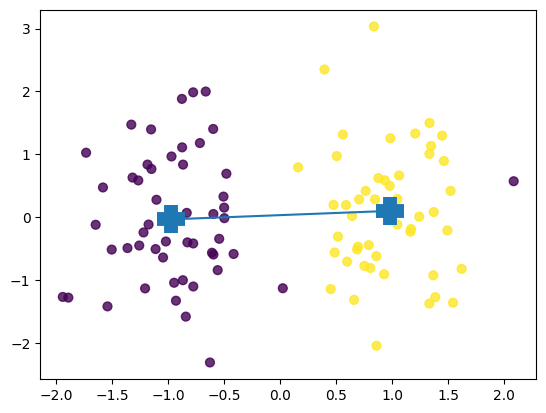

In [26]:
import numpy as np
from scipy.spatial import distance
from sklearn.metrics.pairwise import euclidean_distances
from matplotlib import pyplot as plt
%matplotlib inline

def random_centroids_selection(X, n, k):
    """Рандомно инициализируем центр кластера"""
    result = []
    for obj_id in np.random.randint(0, n, size=k):
        result.append(X[obj_id, :])
    return result

def eval_weight_evolution(centroid_objects_prev, centroid_objects, k):
    """Вычисляем, как сдвинулись центры за один шаг алгоритма"""
    result = []
    for i in range(k):
        dist = distance.euclidean(
            centroid_objects_prev[i],
            centroid_objects[i]
        )
        result.append(dist)
    return result

def eval_centroids(X, k, cluster_lables):
    """Вычисляем новые центроиды с методом усреднения координат"""
    result = []
    for i in range(k):
        new_centroid = X[cluster_lables==i].mean(axis=0)
        result.append(new_centroid)
    return result

def eval_cluster_lables(X, centroid_objects):
    """Вычисляем метки кластеров"""
    # формируем матрицу (n x k), которая содержит расстояние от каждого объекта до каждого центроида
    cluster_distance = euclidean_distances(X, centroid_objects)
    # находим минимальное расстояние в каждой строчке - это будет кластер объекта
    cluster_lables = cluster_distance.argmin(axis=1)
    return cluster_lables

def k_means(X:np.array, k: int=2, eps: float=0.001, num_iteration: int=10) -> np.array:
    """Алгоритм К-средних
    
    :param X: обучающая выборка
    :param k: количество кластеров
    """
    try:
        n, m = X.shape
    except ValueError:
        print("Обучающая выборка должна быть двумерным массивом (n, m) гдк m - размер выборки")
    # инициализируем центроиды случайным элементом выборки
    centroid_objects = random_centroids_selection(X, n, k)
    centroid_objects_prev = [np.zeros(m) for i in range(k)]
    # расстояние между предыдущим и текущим положением каждого центроида
    weight_evolution = eval_weight_evolution(centroid_objects_prev, centroid_objects, k)
    step = 0
    # условие остановки: центроиды не изменили своего положения
    # повторяем до выполнения условия остановки
    while sum(weight_evolution[i] > eps for i in range(k))!=0 and step < num_iteration:
        # иначе можно прострелить себе ногу =0
        centroid_objects_prev = centroid_objects.copy()
        # вычисляем метки кластеров
        cluster_lables = eval_cluster_lables(X, centroid_objects)
        # усредняем координаты объектов каждого кластера - это новое положение центроида
        centroid_objects = eval_centroids(X, k, cluster_lables)
        # вычисляем расстояние между центроидами на соседних итерациях
        weight_evolution = eval_weight_evolution(centroid_objects_prev, centroid_objects, k)
        print(f"шаг {step}, смещение кластеров: {weight_evolution}")
        # обновлённые кластера
        step += 1
    return np.vstack(centroid_objects), cluster_lables
    

centroids, labels = k_means(X, k=2, num_iteration=10)

plt.scatter(X[:, 0], X[:, 1], s=40, c=Y, marker='o', alpha=0.8, label='data')
plt.plot(centroids[:, 0], centroids[:, 1], marker='+', mew=10, ms=20)
plt.show()

В этом уроке мы реализовали KMeans самоcтоятельно:
* поняли, как алгоритм работает "изнутри"
* прокачали свои навыки программирования

В следующем уроке мы рассмотрим алгоритм DBScan - он тоже решает задачу классификации, но делает это по другому: не надо задавать количество кластеров, вместо понятия "близости" точек мы будем использовать понятие "плотность" (о то, что это такое, мы и узнаем в следующем занятии).